# Linear Regression

#### Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cntk
from cntk import Trainer, learning_rate_schedule, UnitType
from cntk.learners import sgd
from cntk.layers import default_options, Dense
import argparse

#### Define the parameters

In [2]:
num_samples = 500
initial_learning_rate = 0.001
num_iterations = 400
num_samples_to_train = 400
batch_size = 25

# Network has only one output which is its prediction.
input_dim = 1
num_outputs = 1
num_minibatches_to_train = int(num_samples_to_train / batch_size)

### Arbitrary data creation

In [3]:
# random data
features = np.linspace(-1, 1, num_samples)
predictions = 2 * features + np.random.randn(*features.shape) * 0.5

### Scatter plot

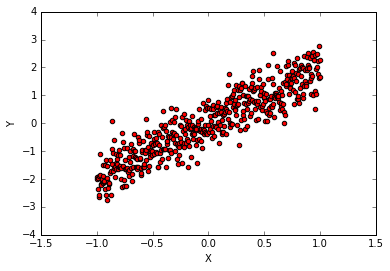

In [4]:
plt.scatter(features, predictions, c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Adding one dimension for further processing. Input must be formatted as (batch_size,1).

In [5]:
features = features[:,None]
predictions = predictions[:,None]


### Network Architecture

#### Output is a single node with a linear operation.

In [6]:
input = cntk.input_variable(input_dim)
label = cntk.input_variable(num_outputs)
pred = Dense(num_outputs)(input)

#### Defining loss

In [7]:
loss = cntk.squared_error(pred, label)
eval_fun = cntk.squared_error(pred, label)

## Training

#### Instantiate the trainer object to drive the model training

In [8]:
learning_rate = learning_rate_schedule(initial_learning_rate, UnitType.minibatch)
optimizer_op = sgd(pred.parameters, learning_rate)
train_op = Trainer(pred, (loss, eval_fun), [optimizer_op])

#### Training loop

In [9]:
for step in range(0, num_iterations):
    for batch_num in range(0, num_minibatches_to_train):
        batch_features = features[(batch_num * batch_size):(batch_num * batch_size + batch_size), :].astype(np.float32)
        batch_labels = predictions[(batch_num * batch_size):(batch_num * batch_size + batch_size), :]
        train_op.train_minibatch({input: batch_features, label: batch_labels})
        training_loss = train_op.previous_minibatch_loss_average
        eval_value = train_op.previous_minibatch_evaluation_average
        print("Minibatch: {0}, Loss: {1:.2f}".format(batch_num, training_loss))

/home/sina/anaconda/envs/cntk-py35/lib/python3.5/site-packages/cntk/core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Minibatch: 0, Loss: 10.57
Minibatch: 1, Loss: 6.96
Minibatch: 2, Loss: 6.33
Minibatch: 3, Loss: 4.41
Minibatch: 4, Loss: 3.04
Minibatch: 5, Loss: 1.90
Minibatch: 6, Loss: 1.11
Minibatch: 7, Loss: 0.98
Minibatch: 8, Loss: 0.51
Minibatch: 9, Loss: 0.22
Minibatch: 10, Loss: 0.23
Minibatch: 11, Loss: 0.58
Minibatch: 12, Loss: 1.34
Minibatch: 13, Loss: 1.95
Minibatch: 14, Loss: 2.47
Minibatch: 15, Loss: 2.87
Minibatch: 0, Loss: 10.29
Minibatch: 1, Loss: 6.75
Minibatch: 2, Loss: 6.15
Minibatch: 3, Loss: 4.27
Minibatch: 4, Loss: 2.93
Minibatch: 5, Loss: 1.82
Minibatch: 6, Loss: 1.06
Minibatch: 7, Loss: 0.94
Minibatch: 8, Loss: 0.49
Minibatch: 9, Loss: 0.22
Minibatch: 10, Loss: 0.23
Minibatch: 11, Loss: 0.60
Minibatch: 12, Loss: 1.36
Minibatch: 13, Loss: 1.97
Minibatch: 14, Loss: 2.49
Minibatch: 15, Loss: 2.88
Minibatch: 0, Loss: 10.02
Minibatch: 1, Loss: 6.55
Minibatch: 2, Loss: 5.97
Minibatch: 3, Loss: 4.13
Minibatch: 4, Loss: 2.82
Minibatch: 5, Loss: 1.75
Minibatch: 6, Loss: 1.01
Minibatch:

Minibatch: 7, Loss: 0.42
Minibatch: 8, Loss: 0.23
Minibatch: 9, Loss: 0.26
Minibatch: 10, Loss: 0.43
Minibatch: 11, Loss: 0.85
Minibatch: 12, Loss: 1.66
Minibatch: 13, Loss: 2.17
Minibatch: 14, Loss: 2.54
Minibatch: 15, Loss: 2.75
Minibatch: 0, Loss: 5.42
Minibatch: 1, Loss: 3.24
Minibatch: 2, Loss: 3.02
Minibatch: 3, Loss: 1.94
Minibatch: 4, Loss: 1.23
Minibatch: 5, Loss: 0.70
Minibatch: 6, Loss: 0.39
Minibatch: 7, Loss: 0.41
Minibatch: 8, Loss: 0.23
Minibatch: 9, Loss: 0.26
Minibatch: 10, Loss: 0.43
Minibatch: 11, Loss: 0.86
Minibatch: 12, Loss: 1.66
Minibatch: 13, Loss: 2.17
Minibatch: 14, Loss: 2.53
Minibatch: 15, Loss: 2.73
Minibatch: 0, Loss: 5.31
Minibatch: 1, Loss: 3.17
Minibatch: 2, Loss: 2.96
Minibatch: 3, Loss: 1.90
Minibatch: 4, Loss: 1.20
Minibatch: 5, Loss: 0.68
Minibatch: 6, Loss: 0.38
Minibatch: 7, Loss: 0.41
Minibatch: 8, Loss: 0.23
Minibatch: 9, Loss: 0.27
Minibatch: 10, Loss: 0.43
Minibatch: 11, Loss: 0.86
Minibatch: 12, Loss: 1.66
Minibatch: 13, Loss: 2.16
Minibatch

Minibatch: 15, Loss: 1.37
Minibatch: 0, Loss: 1.91
Minibatch: 1, Loss: 1.02
Minibatch: 2, Loss: 1.05
Minibatch: 3, Loss: 0.63
Minibatch: 4, Loss: 0.40
Minibatch: 5, Loss: 0.27
Minibatch: 6, Loss: 0.22
Minibatch: 7, Loss: 0.29
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.28
Minibatch: 10, Loss: 0.39
Minibatch: 11, Loss: 0.65
Minibatch: 12, Loss: 1.16
Minibatch: 13, Loss: 1.34
Minibatch: 14, Loss: 1.37
Minibatch: 15, Loss: 1.35
Minibatch: 0, Loss: 1.89
Minibatch: 1, Loss: 1.01
Minibatch: 2, Loss: 1.04
Minibatch: 3, Loss: 0.63
Minibatch: 4, Loss: 0.40
Minibatch: 5, Loss: 0.27
Minibatch: 6, Loss: 0.22
Minibatch: 7, Loss: 0.29
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.28
Minibatch: 10, Loss: 0.39
Minibatch: 11, Loss: 0.64
Minibatch: 12, Loss: 1.15
Minibatch: 13, Loss: 1.32
Minibatch: 14, Loss: 1.36
Minibatch: 15, Loss: 1.34
Minibatch: 0, Loss: 1.87
Minibatch: 1, Loss: 1.00
Minibatch: 2, Loss: 1.03
Minibatch: 3, Loss: 0.62
Minibatch: 4, Loss: 0.39
Minibatch: 5, Loss: 0.27
Minibatch: 6

Minibatch: 11, Loss: 0.56
Minibatch: 12, Loss: 0.99
Minibatch: 13, Loss: 1.11
Minibatch: 14, Loss: 1.09
Minibatch: 15, Loss: 1.06
Minibatch: 0, Loss: 1.48
Minibatch: 1, Loss: 0.79
Minibatch: 2, Loss: 0.84
Minibatch: 3, Loss: 0.51
Minibatch: 4, Loss: 0.33
Minibatch: 5, Loss: 0.25
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.26
Minibatch: 10, Loss: 0.34
Minibatch: 11, Loss: 0.56
Minibatch: 12, Loss: 0.99
Minibatch: 13, Loss: 1.10
Minibatch: 14, Loss: 1.08
Minibatch: 15, Loss: 1.05
Minibatch: 0, Loss: 1.47
Minibatch: 1, Loss: 0.78
Minibatch: 2, Loss: 0.83
Minibatch: 3, Loss: 0.50
Minibatch: 4, Loss: 0.33
Minibatch: 5, Loss: 0.25
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.26
Minibatch: 10, Loss: 0.34
Minibatch: 11, Loss: 0.55
Minibatch: 12, Loss: 0.98
Minibatch: 13, Loss: 1.09
Minibatch: 14, Loss: 1.07
Minibatch: 15, Loss: 1.04
Minibatch: 0, Loss: 1.45
Minibatch: 1, Loss: 0.77
Minibatc

Minibatch: 1, Loss: 0.48
Minibatch: 2, Loss: 0.54
Minibatch: 3, Loss: 0.34
Minibatch: 4, Loss: 0.24
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.23
Minibatch: 10, Loss: 0.26
Minibatch: 11, Loss: 0.40
Minibatch: 12, Loss: 0.69
Minibatch: 13, Loss: 0.70
Minibatch: 14, Loss: 0.61
Minibatch: 15, Loss: 0.60
Minibatch: 0, Loss: 0.85
Minibatch: 1, Loss: 0.48
Minibatch: 2, Loss: 0.53
Minibatch: 3, Loss: 0.33
Minibatch: 4, Loss: 0.24
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.21
Minibatch: 9, Loss: 0.23
Minibatch: 10, Loss: 0.25
Minibatch: 11, Loss: 0.40
Minibatch: 12, Loss: 0.69
Minibatch: 13, Loss: 0.70
Minibatch: 14, Loss: 0.60
Minibatch: 15, Loss: 0.59
Minibatch: 0, Loss: 0.84
Minibatch: 1, Loss: 0.47
Minibatch: 2, Loss: 0.53
Minibatch: 3, Loss: 0.33
Minibatch: 4, Loss: 0.24
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8,

Minibatch: 0, Loss: 0.48
Minibatch: 1, Loss: 0.33
Minibatch: 2, Loss: 0.36
Minibatch: 3, Loss: 0.25
Minibatch: 4, Loss: 0.20
Minibatch: 5, Loss: 0.21
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.22
Minibatch: 9, Loss: 0.20
Minibatch: 10, Loss: 0.20
Minibatch: 11, Loss: 0.30
Minibatch: 12, Loss: 0.50
Minibatch: 13, Loss: 0.45
Minibatch: 14, Loss: 0.33
Minibatch: 15, Loss: 0.38
Minibatch: 0, Loss: 0.47
Minibatch: 1, Loss: 0.33
Minibatch: 2, Loss: 0.36
Minibatch: 3, Loss: 0.25
Minibatch: 4, Loss: 0.20
Minibatch: 5, Loss: 0.21
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.22
Minibatch: 9, Loss: 0.20
Minibatch: 10, Loss: 0.20
Minibatch: 11, Loss: 0.30
Minibatch: 12, Loss: 0.50
Minibatch: 13, Loss: 0.45
Minibatch: 14, Loss: 0.32
Minibatch: 15, Loss: 0.38
Minibatch: 0, Loss: 0.47
Minibatch: 1, Loss: 0.33
Minibatch: 2, Loss: 0.36
Minibatch: 3, Loss: 0.24
Minibatch: 4, Loss: 0.20
Minibatch: 5, Loss: 0.21
Minibatch: 6, Loss: 0.21
Minibatch: 7,

Minibatch: 12, Loss: 0.44
Minibatch: 13, Loss: 0.38
Minibatch: 14, Loss: 0.26
Minibatch: 15, Loss: 0.35
Minibatch: 0, Loss: 0.37
Minibatch: 1, Loss: 0.31
Minibatch: 2, Loss: 0.31
Minibatch: 3, Loss: 0.22
Minibatch: 4, Loss: 0.19
Minibatch: 5, Loss: 0.21
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.22
Minibatch: 9, Loss: 0.20
Minibatch: 10, Loss: 0.19
Minibatch: 11, Loss: 0.27
Minibatch: 12, Loss: 0.44
Minibatch: 13, Loss: 0.38
Minibatch: 14, Loss: 0.26
Minibatch: 15, Loss: 0.35
Minibatch: 0, Loss: 0.37
Minibatch: 1, Loss: 0.31
Minibatch: 2, Loss: 0.31
Minibatch: 3, Loss: 0.22
Minibatch: 4, Loss: 0.19
Minibatch: 5, Loss: 0.21
Minibatch: 6, Loss: 0.21
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.22
Minibatch: 9, Loss: 0.20
Minibatch: 10, Loss: 0.19
Minibatch: 11, Loss: 0.27
Minibatch: 12, Loss: 0.44
Minibatch: 13, Loss: 0.38
Minibatch: 14, Loss: 0.25
Minibatch: 15, Loss: 0.34
Minibatch: 0, Loss: 0.37
Minibatch: 1, Loss: 0.31
Minibatch: 2, Loss: 0.31
Minibatch

Minibatch: 0, Loss: 0.29
Minibatch: 1, Loss: 0.30
Minibatch: 2, Loss: 0.28
Minibatch: 3, Loss: 0.21
Minibatch: 4, Loss: 0.19
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.22
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.23
Minibatch: 9, Loss: 0.19
Minibatch: 10, Loss: 0.18
Minibatch: 11, Loss: 0.26
Minibatch: 12, Loss: 0.40
Minibatch: 13, Loss: 0.33
Minibatch: 14, Loss: 0.21
Minibatch: 15, Loss: 0.34
Minibatch: 0, Loss: 0.29
Minibatch: 1, Loss: 0.30
Minibatch: 2, Loss: 0.28
Minibatch: 3, Loss: 0.21
Minibatch: 4, Loss: 0.19
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.22
Minibatch: 7, Loss: 0.28
Minibatch: 8, Loss: 0.23
Minibatch: 9, Loss: 0.19
Minibatch: 10, Loss: 0.18
Minibatch: 11, Loss: 0.26
Minibatch: 12, Loss: 0.40
Minibatch: 13, Loss: 0.32
Minibatch: 14, Loss: 0.21
Minibatch: 15, Loss: 0.34
Minibatch: 0, Loss: 0.29
Minibatch: 1, Loss: 0.30
Minibatch: 2, Loss: 0.28
Minibatch: 3, Loss: 0.21
Minibatch: 4, Loss: 0.19
Minibatch: 5, Loss: 0.22
Minibatch: 6, Loss: 0.22
Minibatch: 7,

## Model Evaluation

#### Test data

In [10]:
test_features = features[num_samples_to_train:num_samples, :]
test_labels = predictions[num_samples_to_train:num_samples, :]

#### Train data

In [11]:
train_features = features[0:num_samples_to_train, :]
train_labels = predictions[0:num_samples_to_train, :]

#### Print weight and bias

In [12]:
print("Trained parameters are: w= {0:.2f}, b={1:.2f}".format(pred.W.value[0][0], pred.b.value[0]))

Trained parameters are: w= 1.74, b=-0.03


## Plot

#### Evaluation of training set

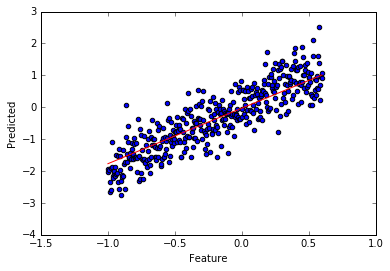

In [13]:
plt.scatter(train_features[:,0], train_labels[:,0], c='b')
X = train_features[:,0]
Y = pred.W.value[0] * train_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()

#### Evaluation on test set

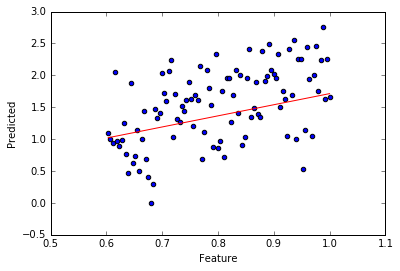

In [14]:
plt.scatter(test_features[:,0], test_labels[:,0], c='b')
X = test_features[:,0]
Y = pred.W.value[0] * test_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()